In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Load Data

In [11]:
from sklearn.datasets import load_iris

data, target = load_iris(return_X_y=True, as_frame=True)
data[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Scale data

In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

data_sc = MinMaxScaler().fit_transform(data)
data_sc = pd.DataFrame(data_sc, columns=data.columns)
data_sc[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [4]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [8]:
list(kf.split(data_sc))[0][0].shape

(120,)

In [9]:
list(kf.split(data_sc))[0][1].shape

(30,)

In [10]:
data_sc.shape

(150, 4)

## Statictics

data - везде pandas.DataFrame

### Corr matrix - простая пирсон корреляция

<Axes: >

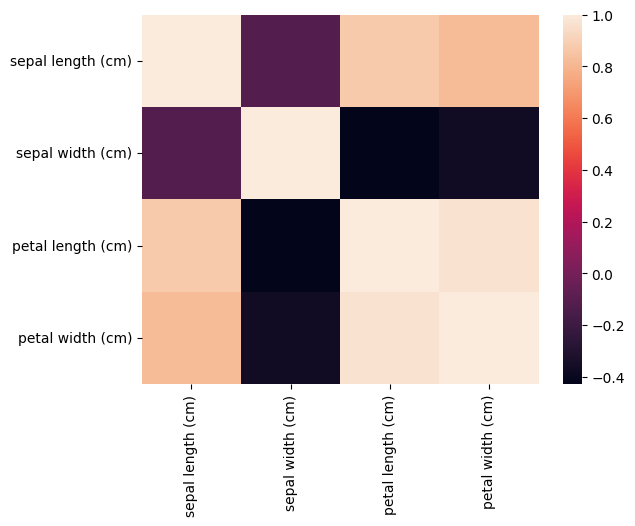

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# База
data = data # ваш DataFrame фич, без таргета

sns.heatmap(data.corr())

<Axes: >

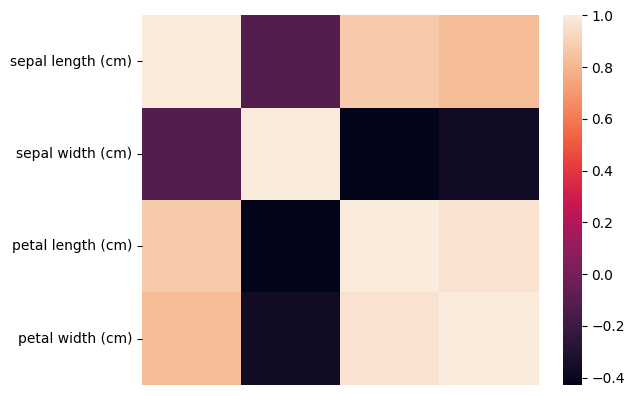

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Params
data = data # ваш DataFrame фич, без таргета
xticklabels = False # убрать дублирующиеся подписи снизу

sns.heatmap(data.corr(), xticklabels=False)

<Axes: >

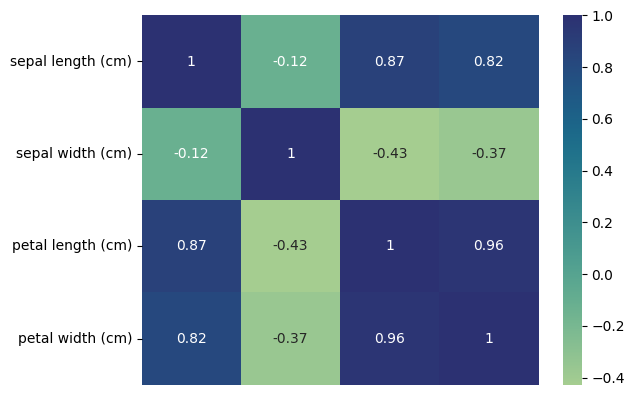

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Params
data = data # ваш DataFrame фич, без таргета
annot = True # писать ли числа в клетках
cmap = "crest" # меняет цветовую гамму, можно задавать кастомную

sns.heatmap(data.corr(), xticklabels=False, cmap=cmap, annot=annot)

### Violin plot - распеределения в виде скрипки

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3473: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  if (await self.run_code(code, result,  async_=asy)):


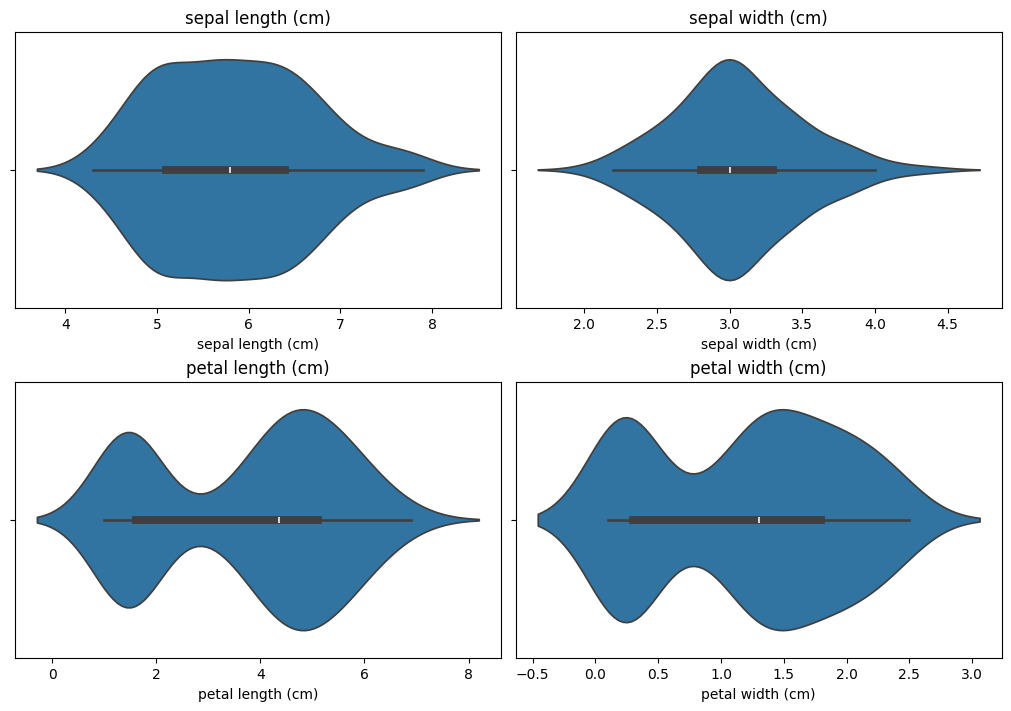

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Params
data = data # ваш DataFrame фич, без таргета
y_pic_num = 2 # кол-во картинок по оси Y
x_pic_num = 2 # кол-во картинок по оси X
figsize_x = 10 # размер картинки по оси X
figsize_y = 7 # размер картинки по оси Y
constrained_layout = True # красивые отступы, подробнее https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html

fig6, ax_ = plt.subplots(y_pic_num, x_pic_num, figsize=(figsize_x, figsize_y), constrained_layout=True)
ax_arr = []
if type(ax_) != np.ndarray :
    ax_arr = [ax_]
else:
    if len(ax_.shape) == 1:
        ax_arr = ax_.tolist()
    else:
        for k in ax_:
            ax_arr += k.tolist()

try:
    columns = data.to_frame().columns
except:
    columns = data.columns

for num, col in enumerate(columns):
    sns.violinplot(x=data[col], ax=ax_arr[num])
    ax_arr[num].set_title(col)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.6)
plt.show()

### BoxPlots

<Axes: xlabel='sepal width (cm)', ylabel='target'>

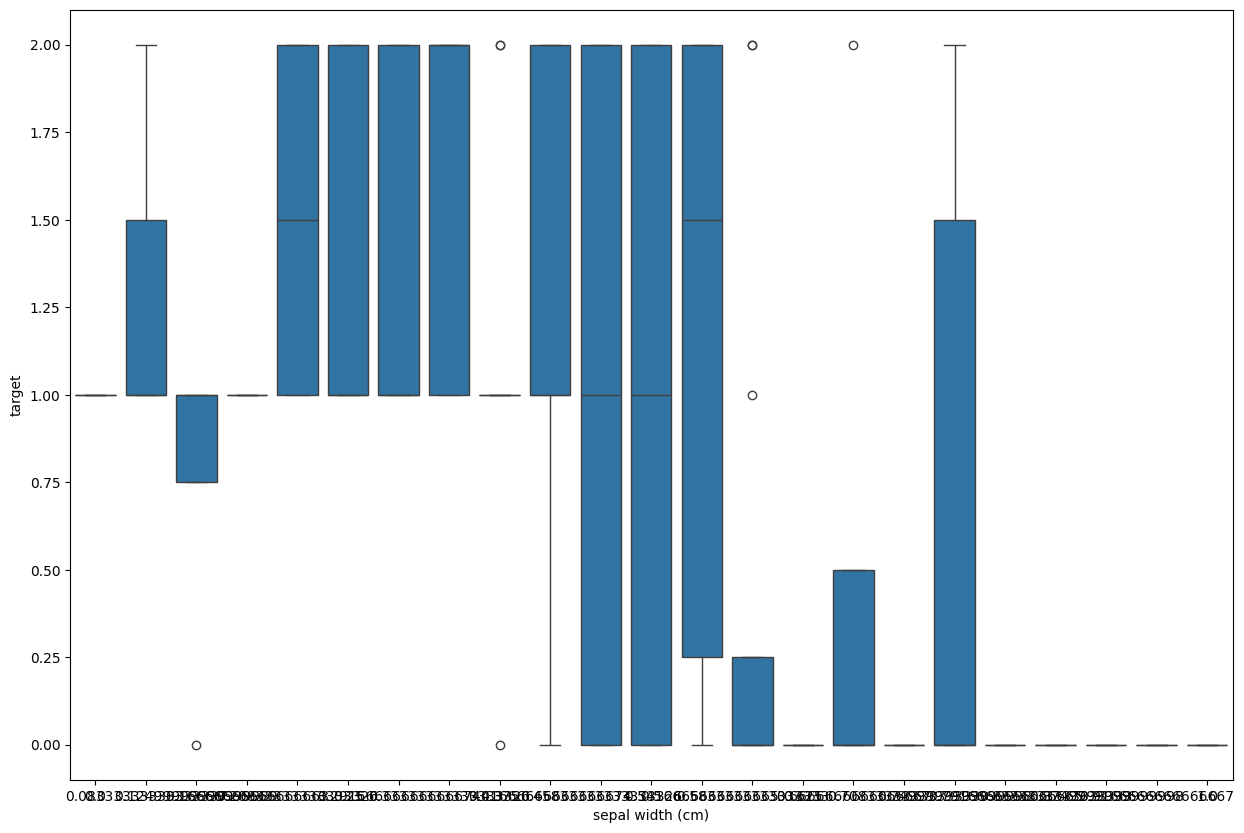

In [16]:
# Актуально для сравнения групп, фичи - категориальны, таргет - непрерывный

plt.figure(figsize = [15, 10])
data_sc['target'] = target
sns.boxplot(data=data_sc, x="sepal width (cm)", y="target")

### Bar plot для категориальных параметров

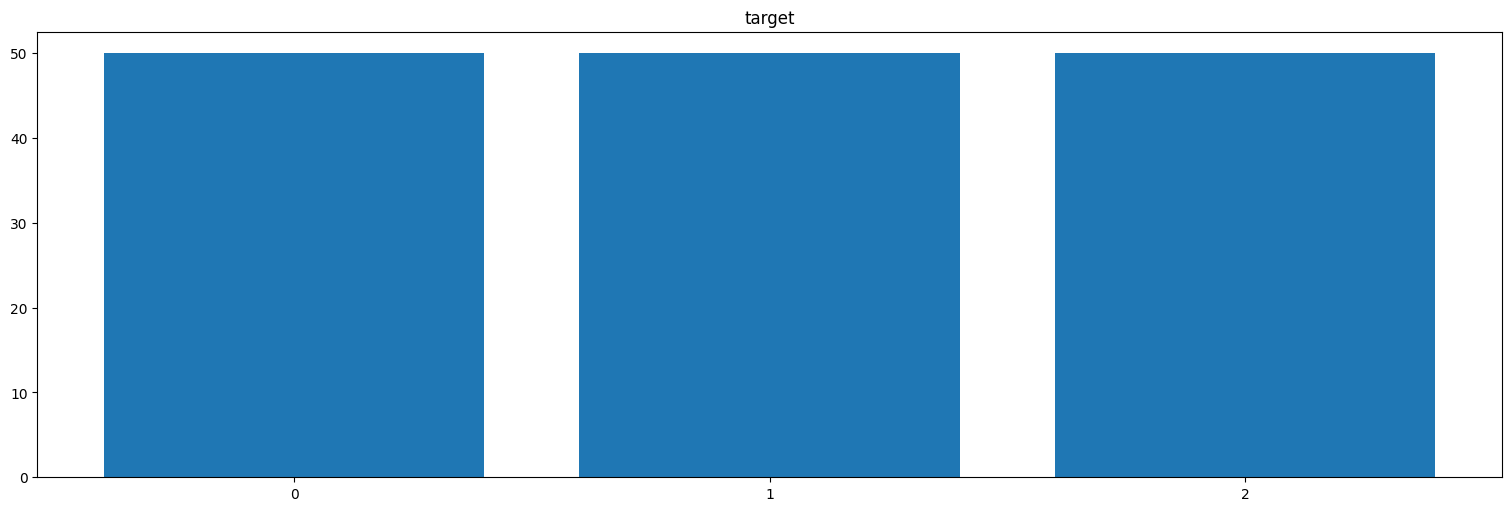

In [ ]:
# Params
data = target # ваш DataFrame фич, без таргета
y_pic_num = 1 # кол-во картинок по оси Y
x_pic_num = 1 # кол-во картинок по оси X
figsize_x = 15 # размер картинки по оси X
figsize_y = 5 # размер картинки по оси Y
constrained_layout = True # красивые отступы, подробнее https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html

fig6, ax_ = plt.subplots(y_pic_num, x_pic_num, figsize=(figsize_x, figsize_y), constrained_layout=True)
ax_arr = []

if type(ax_) != np.ndarray :
    ax_arr = [ax_]
else:
    if len(ax_.shape) == 1:
        ax_arr = ax_.tolist()
    else:
        for k in ax_:
            ax_arr += k.tolist()
try:
    data = data.to_frame()
    columns = data.columns
except:
    columns = data.columns

for num, col in enumerate(columns):
    unique_vals = data[col].unique()
    counts = []
    for uv in unique_vals:
        count = data[data[col] == uv].shape[0]
        counts.append(count)
    ax_arr[num].set_title(col)
    ax_arr[num].bar(unique_vals, counts)
    ax_arr[num].set_xticks(range(len(unique_vals)))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.6)
plt.show()

### Scatterplot как зависимость фич от таргета

актуален для непрерывного таргета

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3473: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  if (await self.run_code(code, result,  async_=asy)):


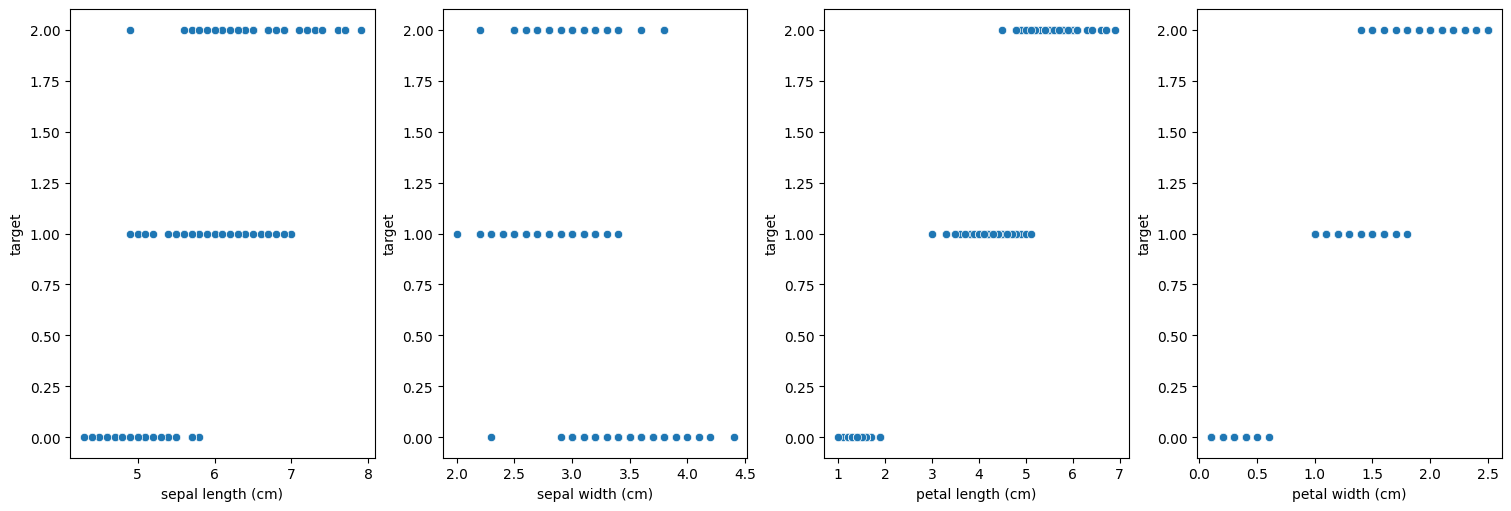

In [ ]:
from sklearn.datasets import load_iris

data, target = load_iris(return_X_y=True, as_frame=True)

import seaborn as sns
import matplotlib.pyplot as plt

# Params
data = data # ваш DataFrame фич, без таргета
target = target # ваш DataFrame таргета
target_name = "target" # название колонки таргета
y_pic_num = 1 # кол-во картинок по оси Y
x_pic_num = 4 # кол-во картинок по оси X
figsize_x = 15 # размер картинки по оси X
figsize_y = 5 # размер картинки по оси Y
constrained_layout = True # красивые отступы, подробнее https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html

fig6, ax_ = plt.subplots(y_pic_num, x_pic_num, figsize=(figsize_x, figsize_y), constrained_layout=True)
ax_arr = []
if type(ax_) != np.ndarray :
    ax_arr = [ax_]
else:
    if len(ax_.shape) == 1:
        ax_arr = ax_.tolist()
    else:
        for k in ax_:
            ax_arr += k.tolist()
try:
    columns = data.to_frame().columns
except:
    columns = data.columns

for num, col in enumerate(columns):
    sns.scatterplot(data=pd.concat([data, target], axis=1), x=col, y=target_name, ax=ax_arr[num])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.6)
plt.show()

### ANOVA - простой вариант, рассматривает чистые группы для групп > 2

Примеры групп:

Группа 0 - значения колонки sepal length с таргетом 0

Группа 1 - значения колонки sepal length с таргетом 1

Группа 2 - значения колонки sepal length с таргетом 2

<br>
<br>
H₀ - нулевая группа: различия между группа статистически не значимо (ну типа одинаковы)

H₁ - опровергающая: хотя бы одна отличается

Задаете уровень статистической значимости - традиционно 0.05

Если в результате p-value больше этого значения - Нуливая теория не опровергается

Если меньше - нулевая теория отвергается, принимается опровергающая

In [ ]:
import pandas as pd
import scipy.stats as st

data, target = load_iris(return_X_y=True, as_frame=True)
full_data = pd.concat([data, target], axis=1)

sepal_length_0 = full_data['sepal length (cm)'][full_data['target'] == 0]
sepal_length_1 = full_data['sepal length (cm)'][full_data['target'] == 1]
sepal_length_2 = full_data['sepal length (cm)'][full_data['target'] == 2]


# Params
alpha = 0.05 # уровень стат значимости

result = st.f_oneway(sepal_length_0, sepal_length_1, sepal_length_2)
print(f"P-Value = {result.pvalue}")
if result.pvalue < 0.05:
    print('хотя бы одна отличается')
else:
    print('одинаковы')

P-Value = 1.6696691907693826e-31
хотя бы одна отличается


### ANOVA - сложный вариант, где информацию о группе представляют несколько фич (колонок)

Очень жирная фигня, больше двух-трех колонок считать - это надо иметь тучку озу

In [ ]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Parametres - перечисляете через сумму в строке все (в идеале) колонки и из комбиначии через двоиточье
# formula = """target ~ C(sepal_length) + C(sepal_width) + C(petal_length) + C(petal_width) + C(sepal_length):C(sepal_width) + C(sepal_length):C(petal_length) + C(sepal_length):C(petal_width) + C(sepal_width):C(petal_length) + C(sepal_width):C(petal_width) + C(petal_length):C(petal_width) + C(sepal_length):C(sepal_width):C(petal_length):C(petal_width)"""
formula = """target ~ C(sepal_length) + C(sepal_width) + C(sepal_length):C(sepal_width)"""

data, target = load_iris(return_X_y=True, as_frame=True)
full_data = pd.concat([data, target], axis=1)
full_data = full_data.rename(columns={"sepal length (cm)": "sepal_length", "sepal width (cm)": "sepal_width", "petal length (cm)": "petal_length", "petal width (cm)": "petal_width"})
model = ols(formula, data=full_data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 34, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 22, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 748, but rank is 115
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(sepal_length),-1.802770e-10,34.0,-2.999566e-11,1.000000e+00
C(sepal_width),NaN,22.0,NaN,NaN
C(sepal_length):C(sepal_width),6.413707e+02,748.0,4.850703e+00,9.892637e-07
Residual,5.833333e+00,33.0,NaN,NaN


### Тест Тьюки - делается после ановы для просмотра "какие имеено группы отличаются"

Бесполезен на больших данных с множеством непрерывных переменных

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

data, target = load_iris(return_X_y=True, as_frame=True)
full_data = pd.concat([data, target], axis=1)

full_data['strategy'] = full_data['sepal_length'].astype(str) + "_" + full_data['sepal_width'].astype(str)

tukey = pairwise_tukeyhsd(endog=full_data['target'], groups=full_data['strategy'], alpha=0.05)
tukey.summary()

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
4.3_3.0 4.4_2.9      0.0    1.0 -2.8935 2.8935  False
4.3_3.0 4.4_3.0      0.0    1.0 -2.8935 2.8935  False
4.3_3.0 4.4_3.2      0.0    1.0 -2.8935 2.8935  False
4.3_3.0 4.5_2.3      0.0    1.0 -2.8935 2.8935  False
4.3_3.0 4.6_3.1      0.0    1.0 -2.8935 2.8935  False
4.3_3.0 4.6_3.2      0.0    1.0 -2.8935 2.8935  False
4.3_3.0 4.6_3.4      0.0    1.0 -2.8935 2.8935  False
4.3_3.0 4.6_3.6      0.0    1.0 -2.8935 2.8935  False
4.3_3.0 4.7_3.2      0.0    1.0 -2.5058 2.5058  False
4.3_3.0 4.8_3.0      0.0    1.0 -2.5058 2.5058  False
4.3_3.0 4.8_3.1      0.0    1.0 -2.8935 2.8935  False
4.3_3.0 4.8_3.4      0.0    1.0 -2.5058 2.5058  False
4.3_3.0 4.9_2.4      1.0    1.0 -1.8935 3.8935  False
4.3_3.0 4.9_2.5      2.0 0.6825 -0.8935 4.8935  False
4.3_3.0 4.9_3.0      0.0    1.0 -2.8935 2.8935  False
4.3_3.0 4.9_3.1      0.0    

### T-Test Стьюдента - как ANOVA но для двух групп

In [ ]:
import pandas as pd
import scipy.stats as st

data, target = load_iris(return_X_y=True, as_frame=True)
full_data = pd.concat([data, target], axis=1)

sepal_length_0 = full_data['sepal length (cm)'][full_data['target'] == 0]
sepal_length_1 = full_data['sepal length (cm)'][full_data['target'] == 1]


# Params
alpha = 0.05 # уровень стат значимости

result = st.ttest_ind(sepal_length_0, sepal_length_1)
print(f"P-Value = {result.pvalue}")
if result.pvalue < 0.05:
    print('отличаются')
else:
    print('одинаковы')

P-Value = 8.985235037487079e-18
отличаются
